# 多层感知机的简洁实现
:label:`sec_mlp_concise`

正如你所期待的，我们可以(**通过高级API更简洁地实现多层感知机**)。


In [1]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

## 模型

与softmax回归的简洁实现（ :numref:`sec_softmax_concise`）相比，
唯一的区别是我们添加了2个全连接层（之前我们只添加了1个全连接层）。
第一层是[**隐藏层**]，它(**包含256个隐藏单元，并使用了ReLU激活函数**)。
第二层是输出层。


In [2]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

[**训练过程**]的实现与我们实现softmax回归时完全相同，
这种模块化设计使我们能够将与和模型架构有关的内容独立出来。


In [3]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

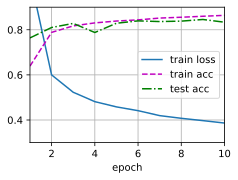

In [4]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。

## 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？


[Discussions](https://discuss.d2l.ai/t/1803)
